In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# --- Importing Libraries ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import yellowbrick
import pickle

from matplotlib.collections import PathCollection
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
from yellowbrick.classifier import PrecisionRecallCurve, ROCAUC, ConfusionMatrix
from yellowbrick.style import set_palette
from yellowbrick.model_selection import LearningCurve, FeatureImportances
from yellowbrick.contrib.wrapper import wrap

# --- Libraries Settings ---
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.dpi']=100
set_palette('dark')

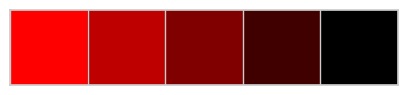

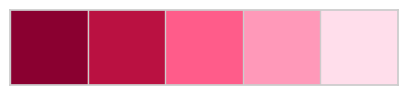

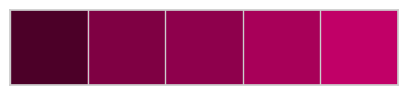

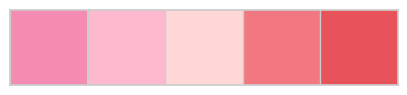

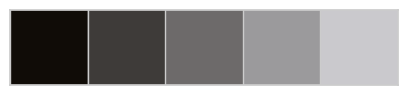

In [ ]:
# --- Create List of Color Palletes ---
red_grad = ['#FF0000', '#BF0000', '#800000', '#400000', '#000000']
pink_grad = ['#8A0030', '#BA1141', '#FF5C8A', '#FF99B9', '#FFDEEB']
purple_grad = ['#4C0028', '#7F0043', '#8E004C', '#A80059', '#C10067']
color_mix = ['#F38BB2', '#FFB9CF', '#FFD7D7', '#F17881', '#E7525B']
black_grad = ['#100C07', '#3E3B39', '#6D6A6A', '#9B9A9C', '#CAC9CD']

# --- Plot Color Palletes --
sns.palplot(red_grad)
sns.palplot(pink_grad)
sns.palplot(purple_grad)
sns.palplot(color_mix)
sns.palplot(black_grad)


## **Reading Dataset**

In [ ]:
# Importing Dataset
data = pd.read_csv("/content/drive/MyDrive/Semester V/Topik Khusus SI Cerdas/heart_target.csv")

In [ ]:
# Reading Dataset
data.head().style.background_gradient(cmap='PuRd').set_properties(**{'font-family' : 'Arial'}).hide_index()

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
63,1,3,145,233,1,0,150,0,2.300000,0,0,1,1
37,1,2,130,250,0,1,187,0,3.500000,0,0,2,1
41,0,1,130,204,0,0,172,0,1.400000,2,0,2,1
56,1,1,120,236,0,1,178,0,0.800000,2,0,2,1
57,0,0,120,354,0,1,163,1,0.600000,2,0,2,1


In [ ]:
# Print Dataset Info
print('\033[1m'+'.: Dataset Info :.'+'\033[0m')
print('*' * 30)
print('Total Rows:'+'\033[1m', data.shape[0])
print('\033[0m'+'Total Columns:'+'\033[1m', data.shape[1])
print('\033[0m'+'*' * 30)
print('\n')

# Print Dataset Detail
print('\033[1m'+'.: Dataset Details :.'+'\033[0m')
print('*' * 30)
data.info(memory_usage = False)

.: Dataset Info :.
******************************
Total Rows: 303
Total Columns: 14
******************************


.: Dataset Details :.
******************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)

In [ ]:
# --- Fix Data Types ---
lst=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
data[lst] = data[lst].astype(object)

## **Initial Data Exploration**

**Categorical Variable**

1. Sex (Gender)

*************************
.: Sex (Gender) Total :.
*************************


1    207
0     96
Name: sex, dtype: int64

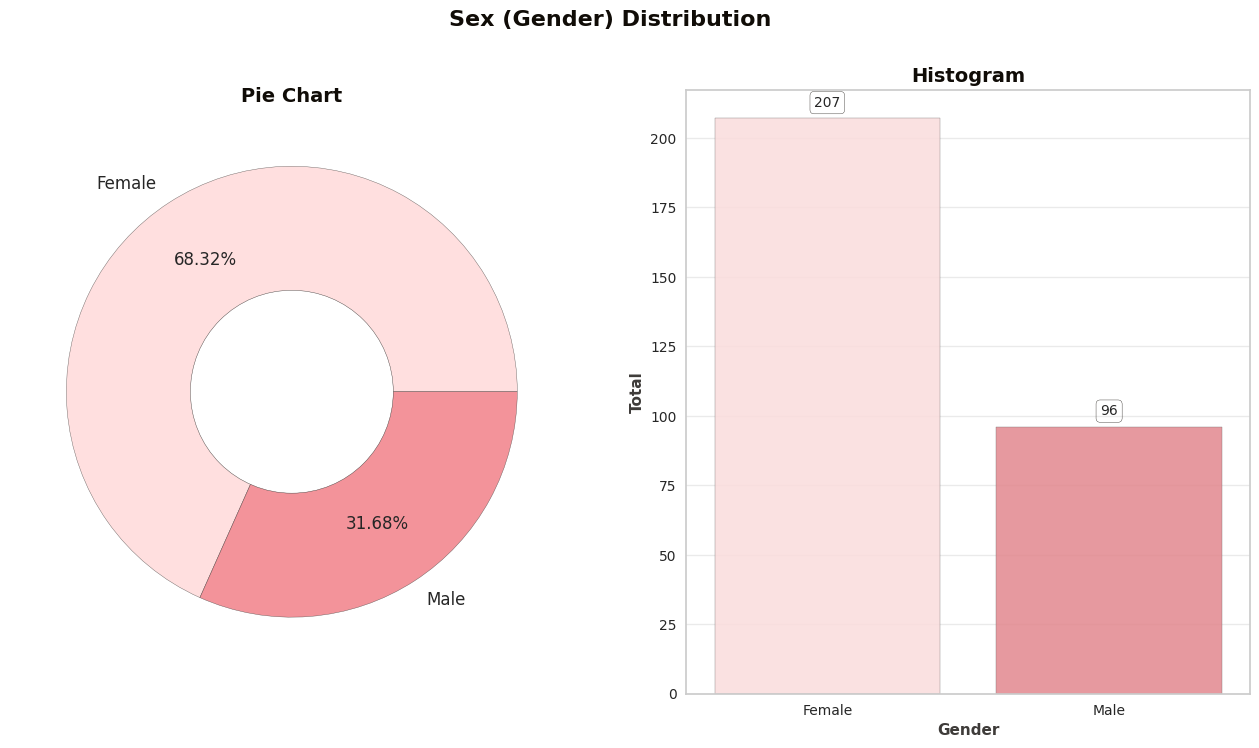

In [ ]:
# --- Setting Colors, Labels, Order ---
colors= color_mix[2:4]
labels=['Female', 'Male']
order=data['sex'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Sex (Gender) Distribution', fontweight='heavy', 
             fontsize='16', fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14,
          fontfamily='sans-serif', color=black_grad[0])
plt.pie(data['sex'].value_counts(), labels=labels, colors=colors, pctdistance=0.7,
        autopct='%.2f%%', wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]),
        textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[0])
ax = sns.countplot(x='sex', data=data, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10, 
             bbox=dict(facecolor='none', edgecolor=black_grad[0], 
                       linewidth=0.25, boxstyle='round'))

plt.xlabel('Gender', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 25)
print('\033[1m'+'.: Sex (Gender) Total :.'+'\033[0m')
print('*' * 25)
data.sex.value_counts(dropna=False)

2. cp (Chest Pain Type)

******************************
.: Chest Pain Type Total :.
******************************


0    143
2     87
1     50
3     23
Name: cp, dtype: int64

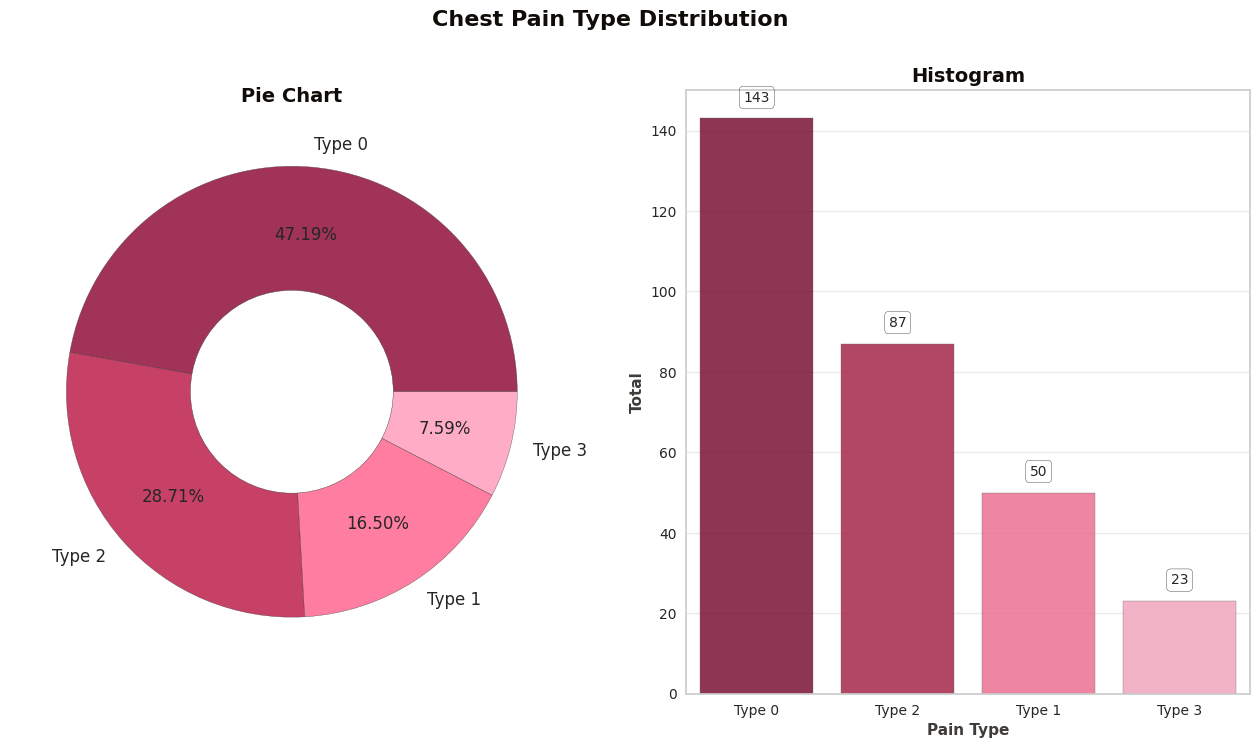

In [ ]:
# --- Setting Colors, Labels, Order ---
colors=pink_grad[0:4]
labels=['Type 0', 'Type 2', 'Type 1', 'Type 3']
order=data['cp'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Chest Pain Type Distribution', fontweight='heavy', fontsize=16, 
             fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14,fontfamily='sans-serif', 
          color=black_grad[0])
plt.pie(data['cp'].value_counts(), labels=labels, colors=colors, pctdistance=0.7, 
        autopct='%.2f%%', textprops={'fontsize':12},
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]))
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
ax = sns.countplot(x='cp', data=data, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Pain Type', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.xticks([0, 1, 2, 3], labels)
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 30)
print('\033[1m'+'.: Chest Pain Type Total :.'+'\033[0m')
print('*' * 30)
data.cp.value_counts(dropna=False)

3. fbs (Fasting Blood Sugar)

********************************
.: Fasting Blood Sugar Total :.
********************************


0    258
1     45
Name: fbs, dtype: int64

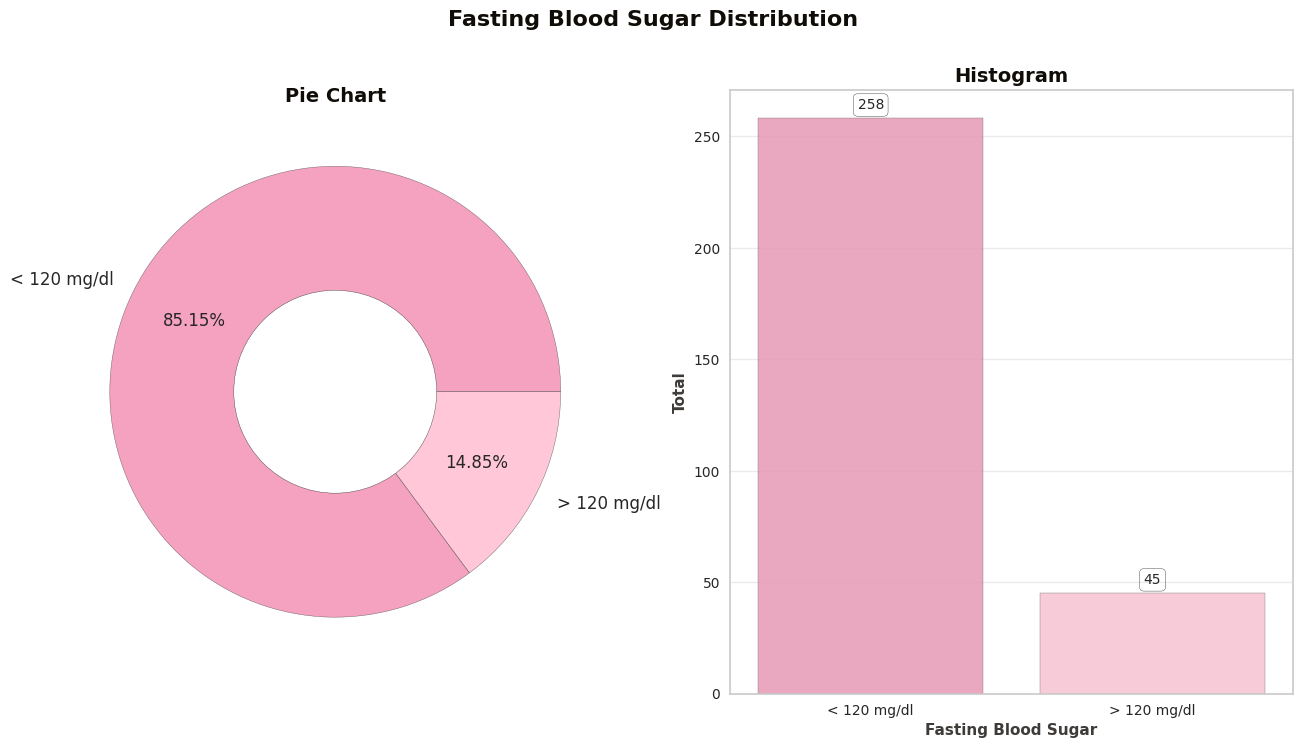

In [ ]:
# --- Setting Colors, Labels, Order ---
colors=color_mix[0:2]
labels=['< 120 mg/dl', '> 120 mg/dl']
order=data['fbs'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Fasting Blood Sugar Distribution', fontweight='heavy', 
             fontsize=16, fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
plt.pie(data['fbs'].value_counts(), labels=labels, colors=colors,
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), autopct='%.2f%%',
        pctdistance=0.7, textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
ax = sns.countplot(x='fbs', data=data, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Fasting Blood Sugar', fontweight='bold', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 32)
print('\033[1m'+'.: Fasting Blood Sugar Total :.'+'\033[0m')
print('*' * 32)
data.fbs.value_counts(dropna=False)

4. restecg (Resting Electrocardiographic Results)

**************************************************
.: Resting Electrocardiographic Results Total :.
**************************************************


1    152
0    147
2      4
Name: restecg, dtype: int64

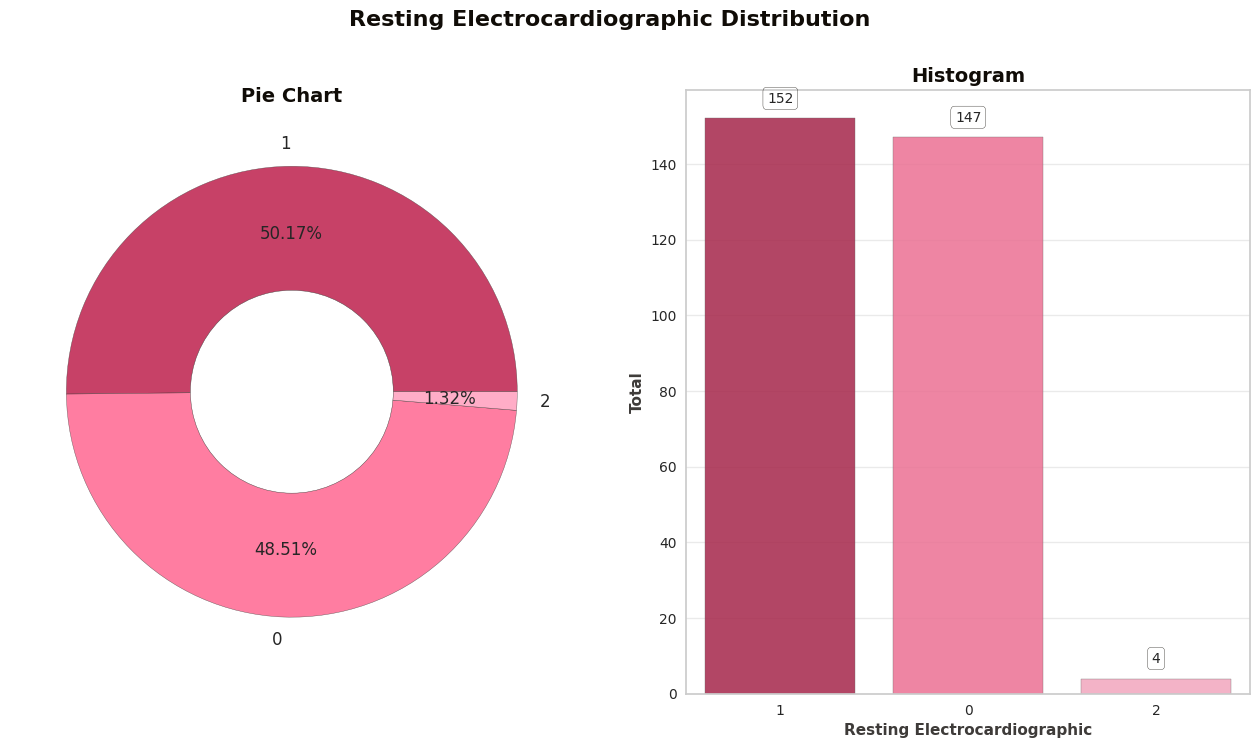

In [ ]:
# --- Setting Colors, Labels, Order ---
colors=pink_grad[1:4]
labels=['1', '0', '2']
order=data['restecg'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Resting Electrocardiographic Distribution', fontweight='heavy', 
             fontsize=16, fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1,2,1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
plt.pie(data['restecg'].value_counts(), labels=labels, colors=colors, 
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), autopct='%.2f%%',
        pctdistance=0.7, textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
ax = sns.countplot(x='restecg', data=data, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Resting Electrocardiographic', fontweight='bold', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 50)
print('\033[1m'+'.: Resting Electrocardiographic Results Total :.'+'\033[0m')
print('*' * 50)
data.restecg.value_counts(dropna=False)

5. exang (Exercise Induced Angina)

***********************************
.: Exercise Induced Angina Total :.
***********************************


0    204
1     99
Name: exang, dtype: int64

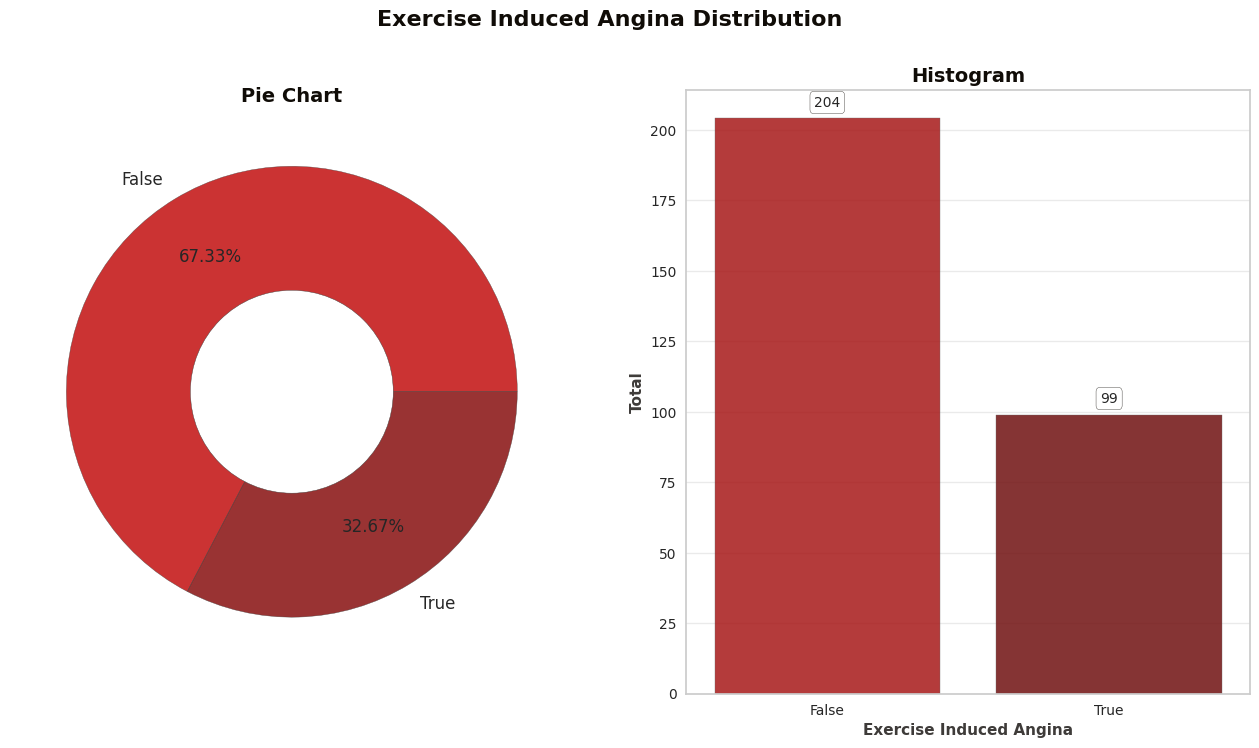

In [ ]:
# --- Setting Colors, Labels, Order ---
colors=red_grad[1:3]
labels=['False', 'True']
order=data['exang'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Exercise Induced Angina Distribution', fontweight='heavy', 
             fontsize=16, fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1,2,1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif',
          color=black_grad[0])
plt.pie(data['exang'].value_counts(), labels=labels, colors=colors, 
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), autopct='%.2f%%',
        pctdistance=0.7, textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
ax = sns.countplot(x='exang', data=data, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Exercise Induced Angina', fontweight='bold', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 35)
print('\033[1m'+'.: Exercise Induced Angina Total :.'+'\033[0m')
print('*' * 35)
data.exang.value_counts(dropna=False)

6. slope (Slope of the Peak Exercise)

********************
.: Slope Total :.
********************


2    142
1    140
0     21
Name: slope, dtype: int64

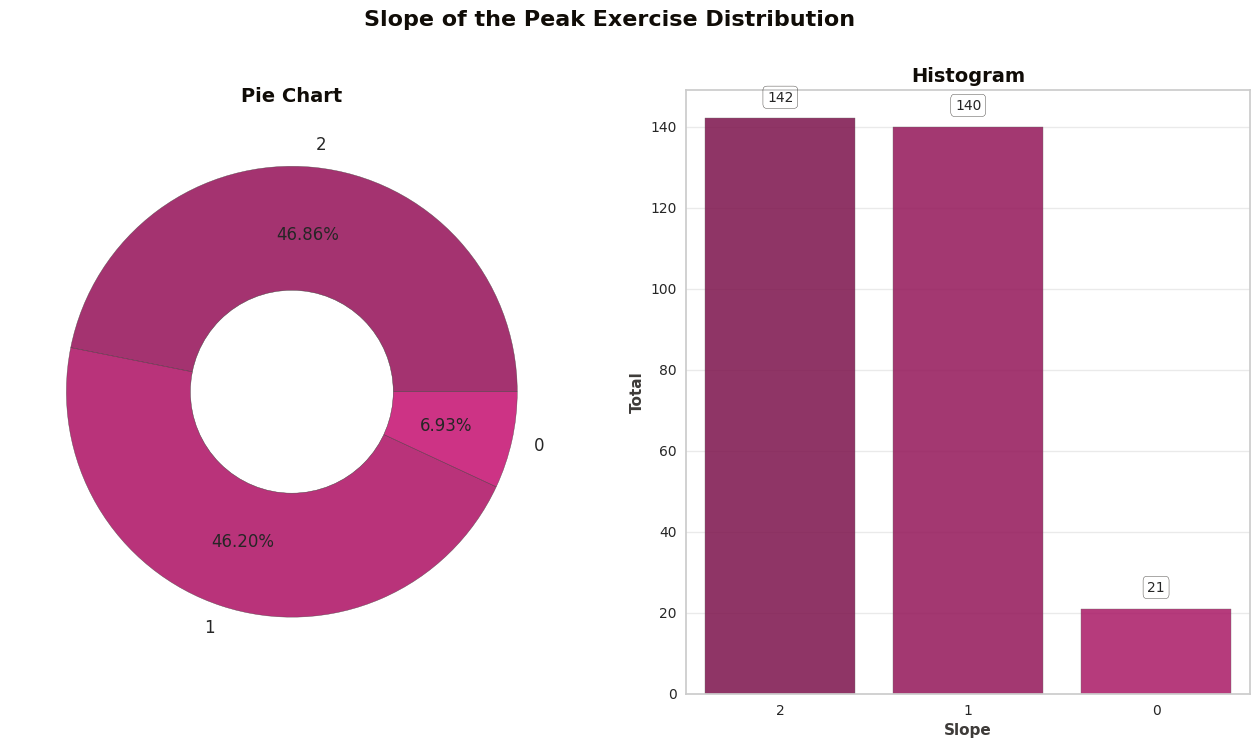

In [ ]:
# --- Setting Colors, Labels, Order ---
colors=purple_grad[2:5]
labels=['2', '1', '0']
order=data['slope'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Slope of the Peak Exercise Distribution', fontweight='heavy', 
             fontsize=16, fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14,
          fontfamily='sans-serif', color=black_grad[0])
plt.pie(data['slope'].value_counts(), labels=labels, colors=colors, 
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), autopct='%.2f%%',
        pctdistance=0.7, textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
ax = sns.countplot(x='slope', data=data, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Slope', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 20)
print('\033[1m'+'.: Slope Total :.'+'\033[0m')
print('*' * 20)
data.slope.value_counts(dropna=False)

7. ca (Number of Major Vessels)

****************************************
.: Number of Major Vessels Total :.
****************************************


0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

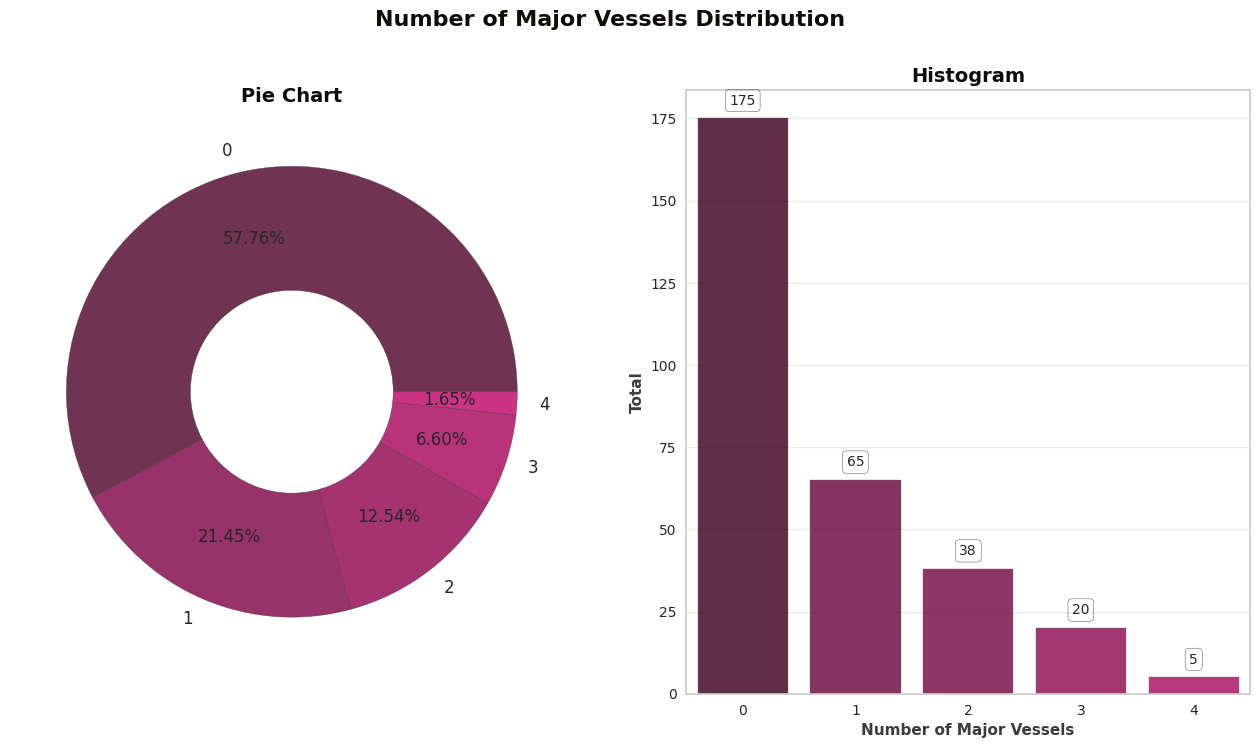

In [ ]:
# --- Setting Colors, Labels, Order ---
colors=purple_grad
labels=['0', '1', '2', '3', '4']
order=data['ca'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Number of Major Vessels Distribution', fontweight='heavy', 
             fontsize=16, fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1,2,1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif',
          color=black_grad[0])
plt.pie(data['ca'].value_counts(), labels=labels, colors=colors, 
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), 
        autopct='%.2f%%', pctdistance=0.7, textprops={'fontsize':12})

centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
ax = sns.countplot(x='ca', data=data, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Number of Major Vessels', fontweight='bold', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 40)
print('\033[1m'+'.: Number of Major Vessels Total :.'+'\033[0m')
print('*' * 40)
data.ca.value_counts(dropna=False)

8. thal

********************
.: "thal" Total :.
********************


2    166
3    117
1     18
0      2
Name: thal, dtype: int64

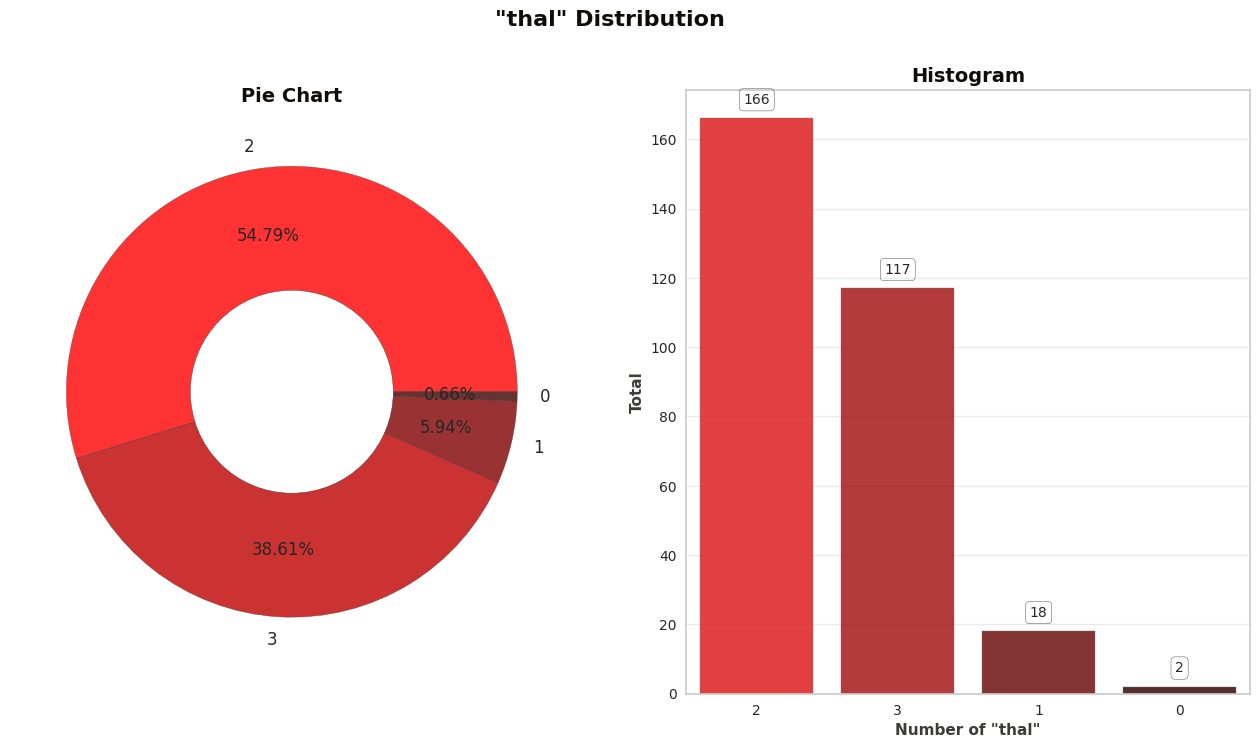

In [ ]:
# --- Setting Colors, Labels, Order ---
colors=red_grad[0:4]
labels=['2', '3', '1', '0']
order=data['thal'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16,8))
plt.suptitle('"thal" Distribution', fontweight='heavy', fontsize=16, 
             fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1,2,1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
plt.pie(data['thal'].value_counts(), labels=labels, colors=colors, 
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), 
        autopct='%.2f%%', pctdistance=0.7, textprops={'fontsize':12})

centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
ax = sns.countplot(x='thal', data=data, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Number of "thal"', fontweight='bold', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 20)
print('\033[1m'+'.: "thal" Total :.'+'\033[0m')
print('*' * 20)
data.thal.value_counts(dropna=False)

9. target (Heart Diseases Status)

*********************************************
.: Heart Diseases Status (target) Total :.
*********************************************


1    165
0    138
Name: target, dtype: int64

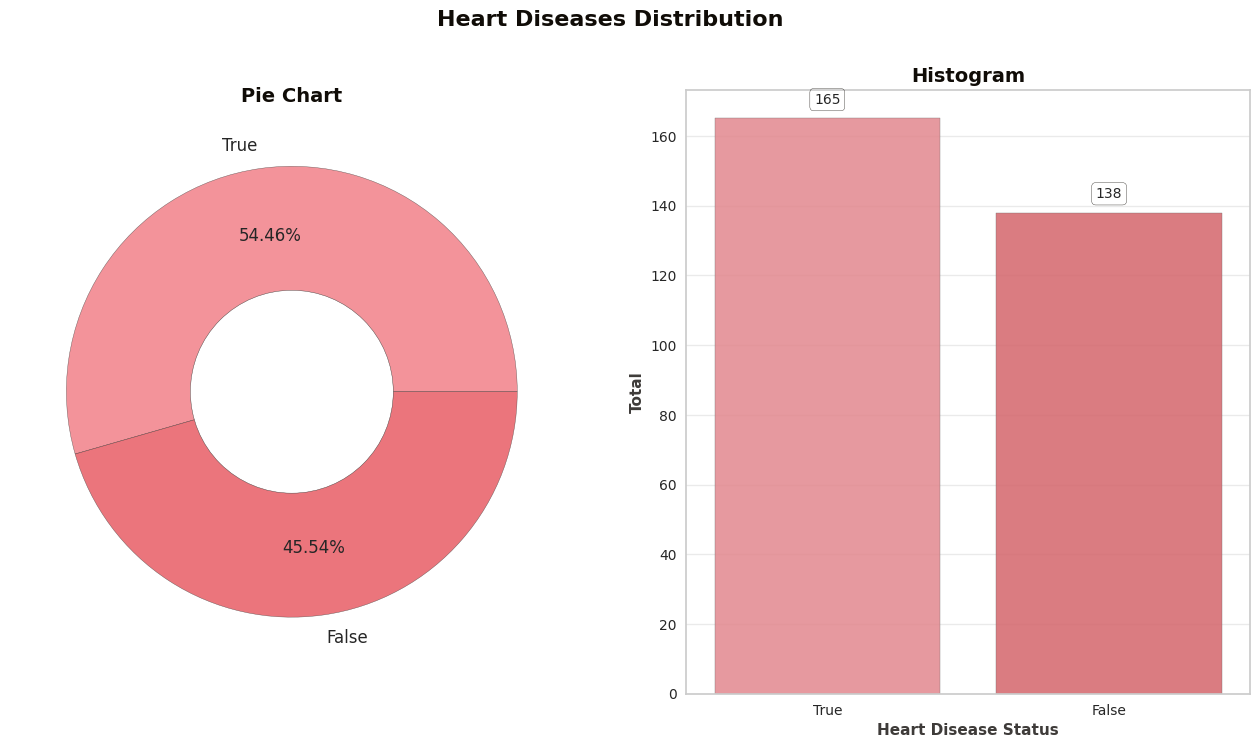

In [ ]:
# --- Setting Colors, Labels, Order ---
colors=color_mix[3:5]
labels=['True', 'False']
order=data['target'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16,8))
plt.suptitle('Heart Diseases Distribution', fontweight='heavy', 
             fontsize=16, fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif',
          color=black_grad[0])
plt.pie(data['target'].value_counts(), labels=labels, colors=colors, 
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), autopct='%.2f%%',
        pctdistance=0.7, textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
ax = sns.countplot(x='target', data=data, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Heart Disease Status', fontweight='bold', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 45)
print('\033[1m'+'.: Heart Diseases Status (target) Total :.'+'\033[0m')
print('*' * 45)
data.target.value_counts(dropna=False)

## **Numerical Variable**

1. Descriptive Statistics

In [ ]:
# --- Descriptive Statistics ---
data.select_dtypes(exclude='object').describe().T.style.background_gradient(cmap='PuRd').set_properties(**{'font-family': 'Segoe UI'})

,count,mean,std,min,25%,50%,75%,max
age,303.000000,54.366337,9.082101,29.000000,47.500000,55.000000,61.000000,77.000000
trestbps,303.000000,131.623762,17.538143,94.000000,120.000000,130.000000,140.000000,200.000000
chol,303.000000,246.264026,51.830751,126.000000,211.000000,240.000000,274.500000,564.000000
thalach,303.000000,149.646865,22.905161,71.000000,133.500000,153.000000,166.000000,202.000000
oldpeak,303.000000,1.039604,1.161075,0.000000,0.000000,0.800000,1.600000,6.200000
target,303.000000,0.544554,0.498835,0.000000,0.000000,1.000000,1.000000,1.000000


Bisa kita lihat bahwa age, trestbps, chol, dan thalach kurang bervariasi.

Simpangan baku rendah berarti data dikelompokkan di sekitar rata-rata (kurangnya variasi), dan simpangan baku tinggi menunjukkan data lebih tersebar (lebih banyak variasi).

2. Continous Column Distribution


*   age (Patient age)



.: Age Column Skewness & Kurtosis :.
****************************************
Skewness: -0.202
Kurtosis: -0.542




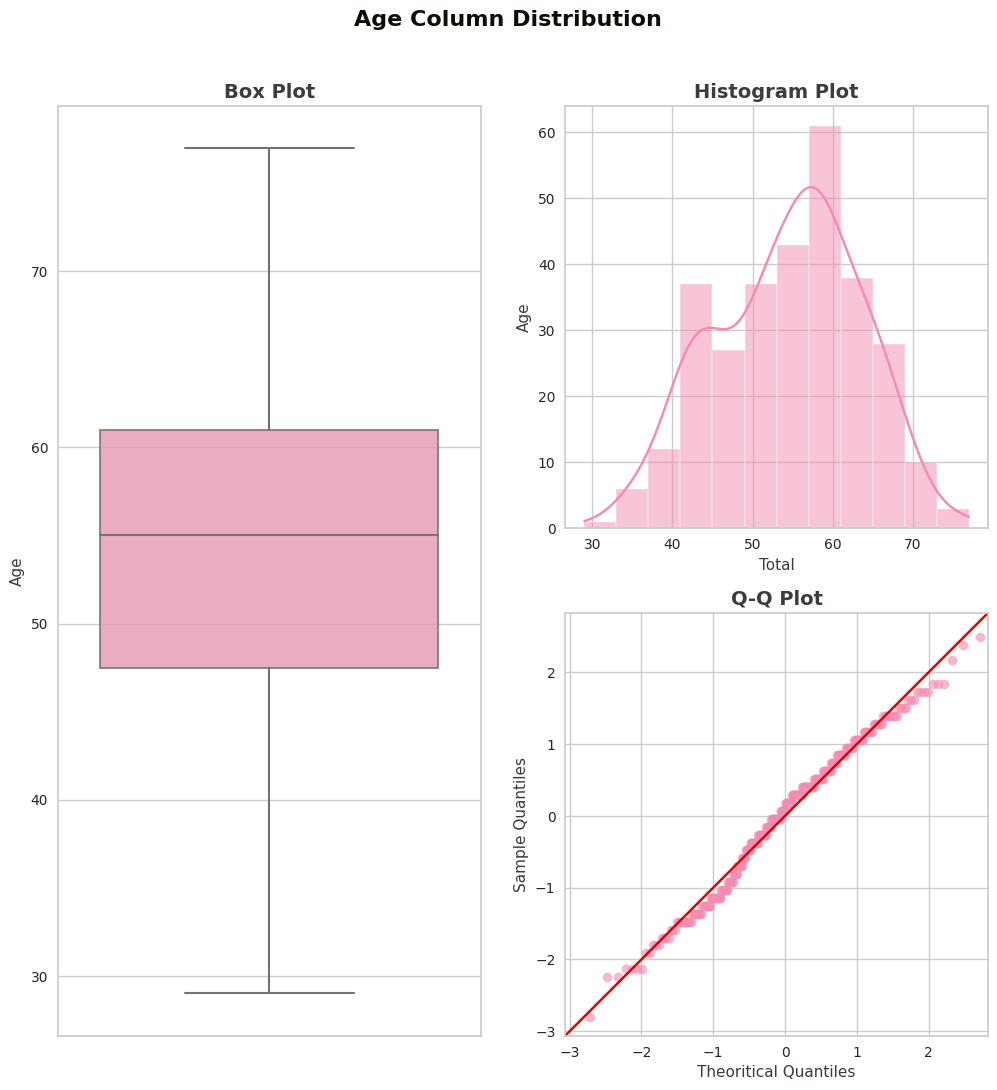

In [ ]:
# --- Variable, Color & Plot Size ---
var = 'age'
color = color_mix[0]
fig=plt.figure(figsize=(12, 12))

# --- Skewness & Kurtosis ---
print('\033[1m'+'.: Age Column Skewness & Kurtosis :.'+'\033[0m')
print('*' * 40)
print('Skewness:'+'\033[1m {:.3f}'.format(data[var].skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(data[var].kurt(axis = 0, skipna = True)))
print('\n')

# --- General Title ---
fig.suptitle('Age Column Distribution', fontweight='bold', fontsize=16, 
             fontfamily='sans-serif', color=black_grad[0])
fig.subplots_adjust(top=0.9)

# --- Histogram ---
ax_1=fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
sns.histplot(data=data, x=var, kde=True, color=color)
plt.xlabel('Total', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Age', fontweight='regular', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])

# --- Q-Q Plot ---
ax_2=fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
qqplot(data[var], fit=True, line='45', ax=ax_2, markerfacecolor=color, 
       markeredgecolor=color, alpha=0.6)
plt.xlabel('Theoritical Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Sample Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])

# --- Box Plot ---
ax_3=fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[1])
sns.boxplot(data=data, y=var, color=color, boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('Age', fontweight='regular', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])

plt.show()

* trestbps (Resting Blood Pressure in mm Hg)

.: Resting Blood Pressure Column Skewness & Kurtosis :.
*******************************************************
Skewness: 0.714
Kurtosis: 0.929




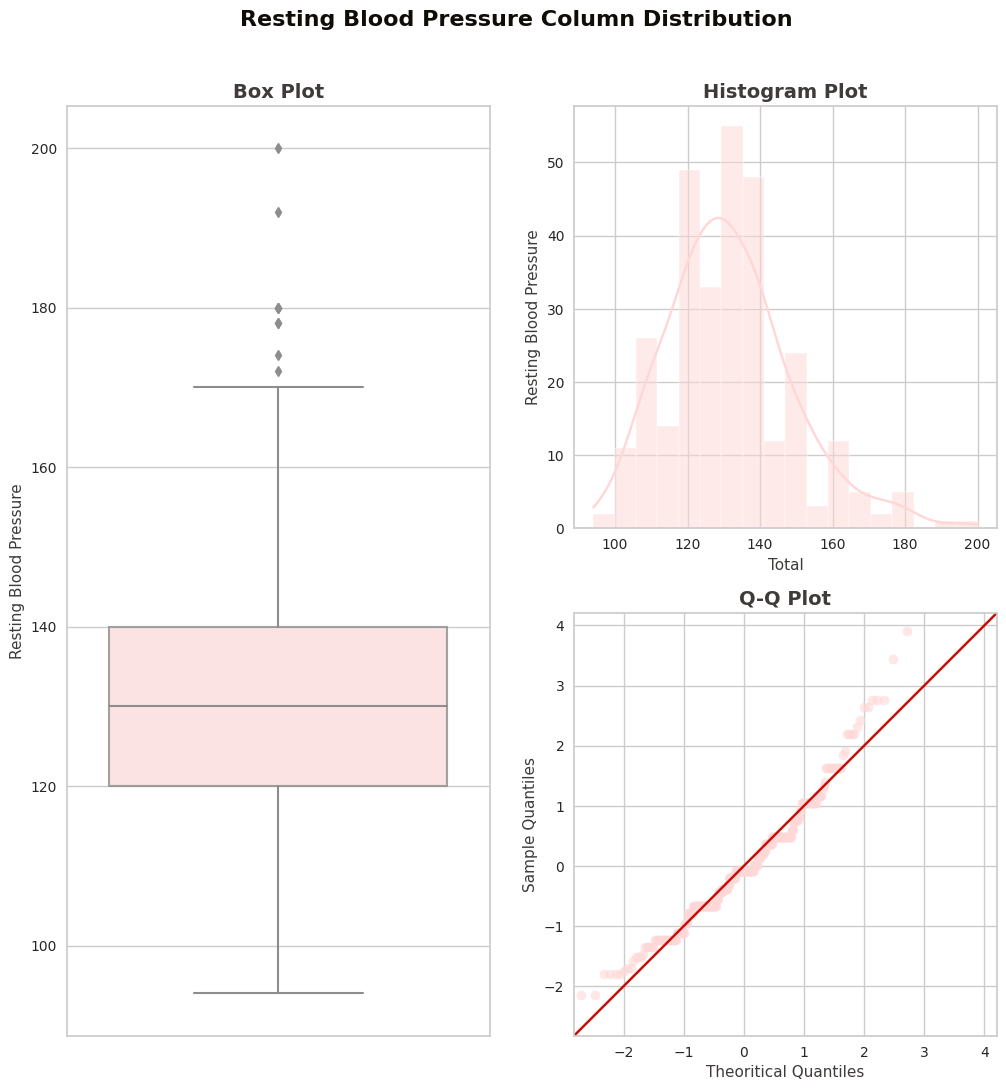

In [ ]:
# --- Variable, Color & Plot Size ---
var = 'trestbps'
color = color_mix[2]
fig=plt.figure(figsize=(12, 12))

# --- Skewness & Kurtosis ---
print('\033[1m'+'.: Resting Blood Pressure Column Skewness & Kurtosis :.'+'\033[0m')
print('*' * 55)
print('Skewness:'+'\033[1m {:.3f}'.format(data[var].skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(data[var].kurt(axis = 0, skipna = True)))
print('\n')

# --- General Title ---
fig.suptitle('Resting Blood Pressure Column Distribution', fontweight='bold', 
             fontsize=16, fontfamily='sans-serif', color=black_grad[0])
fig.subplots_adjust(top=0.9)

# --- Histogram ---
ax_1=fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
sns.histplot(data=data, x=var, kde=True, color=color)
plt.xlabel('Total', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Resting Blood Pressure', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])

# --- Q-Q Plot ---
ax_2=fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
qqplot(data[var], fit=True, line='45', ax=ax_2, markerfacecolor=color, 
       markeredgecolor=color, alpha=0.6)
plt.xlabel('Theoritical Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Sample Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])

# --- Box Plot ---
ax_3=fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[1])
sns.boxplot(data=data, y=var, color=color, boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('Resting Blood Pressure', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])

plt.show()

* chol (Serum Cholestoral in mg/dl)

.: Serum Cholestoral Column Skewness & Kurtosis :.
*********************************************
Skewness: 1.143
Kurtosis: 4.505




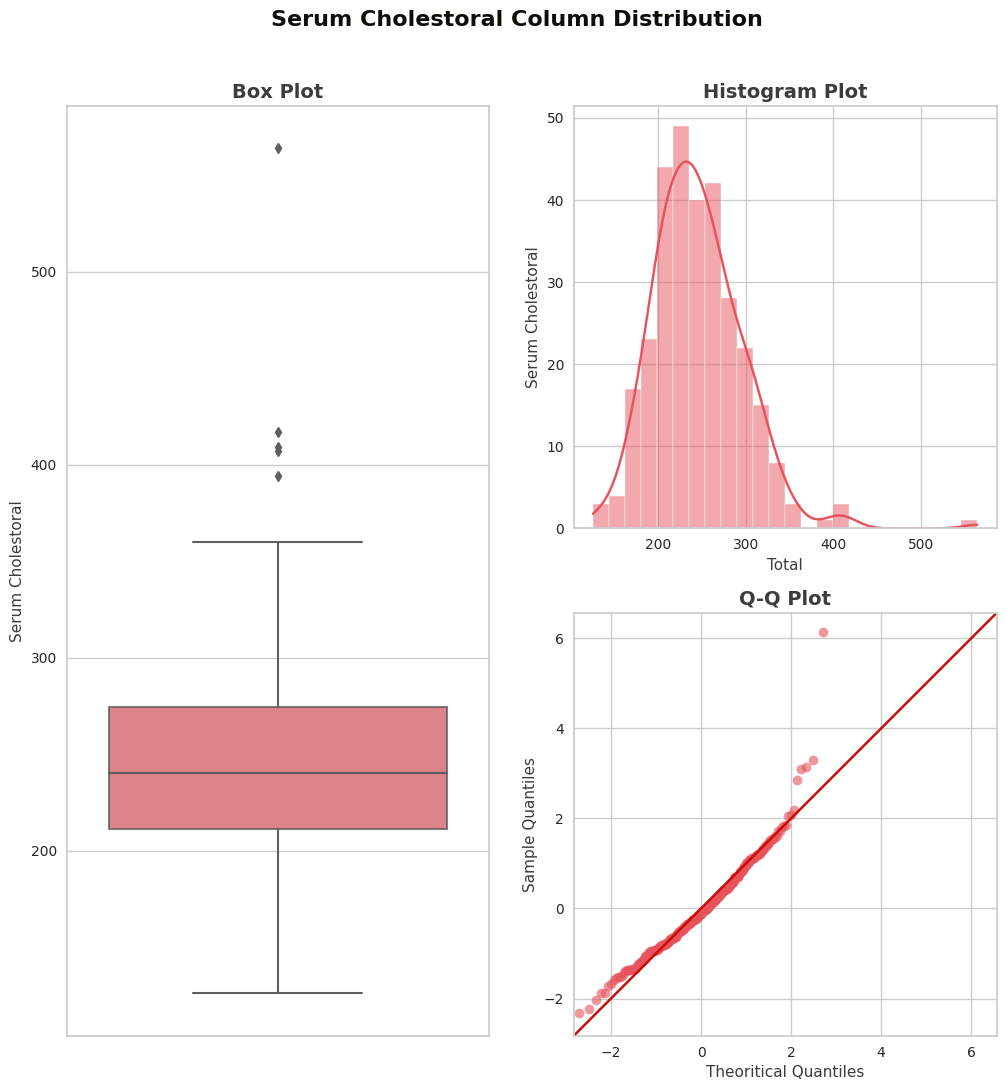

In [ ]:
# --- Variable, Color & Plot Size ---
var = 'chol'
color = color_mix[4]
fig=plt.figure(figsize=(12, 12))

# --- Skewness & Kurtosis ---
print('\033[1m'+'.: Serum Cholestoral Column Skewness & Kurtosis :.'+'\033[0m')
print('*' * 45)
print('Skewness:'+'\033[1m {:.3f}'.format(data[var].skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(data[var].kurt(axis = 0, skipna = True)))
print('\n')

# --- General Title ---
fig.suptitle('Serum Cholestoral Column Distribution', fontweight='bold', 
             fontsize=16, fontfamily='sans-serif', color=black_grad[0])
fig.subplots_adjust(top=0.9)

# --- Histogram ---
ax_1=fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
sns.histplot(data=data, x=var, kde=True, color=color)
plt.xlabel('Total', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Serum Cholestoral', fontweight='regular', fontsize=11,
           fontfamily='sans-serif', color=black_grad[1])

# --- Q-Q Plot ---
ax_2=fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[1])
qqplot(data[var], fit=True, line='45', ax=ax_2, markerfacecolor=color, 
       markeredgecolor=color, alpha=0.6)
plt.xlabel('Theoritical Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Sample Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])

# --- Box Plot ---
ax_3=fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
sns.boxplot(data=data, y=var, color=color, boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('Serum Cholestoral', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])

plt.show()

* thalach (Maximum Heart Rate)

.: Maximum Heart Rate Column Skewness & Kurtosis :.
**************************************************
Skewness: -0.537
Kurtosis: -0.062




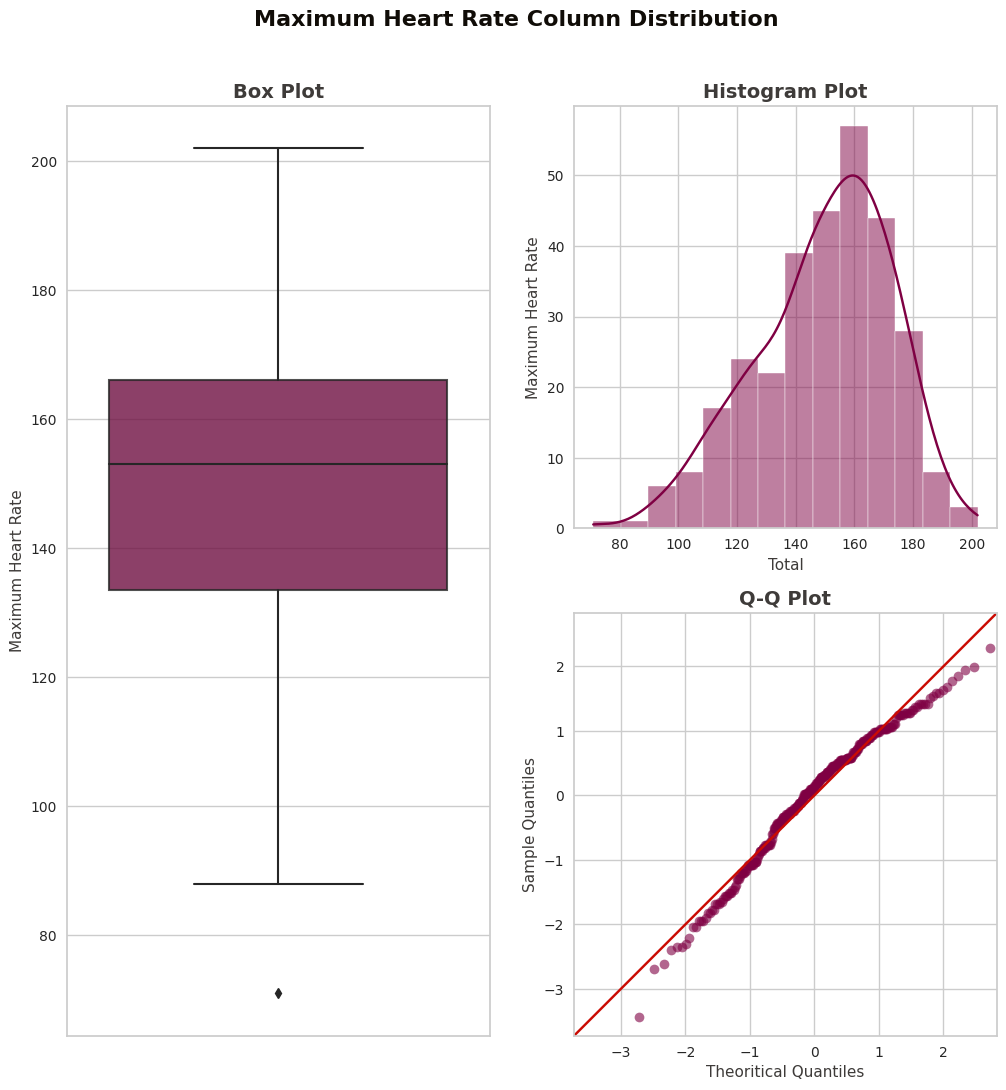

In [ ]:
# --- Variable, Color & Plot Size ---
var = 'thalach'
color = purple_grad[1]
fig=plt.figure(figsize=(12, 12))

# --- Skewness & Kurtosis ---
print('\033[1m'+'.: Maximum Heart Rate Column Skewness & Kurtosis :.'+'\033[0m')
print('*' * 50)
print('Skewness:'+'\033[1m {:.3f}'.format(data[var].skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(data[var].kurt(axis = 0, skipna = True)))
print('\n')

# --- General Title ---
fig.suptitle('Maximum Heart Rate Column Distribution', fontweight='bold', 
             fontsize=16, fontfamily='sans-serif', color=black_grad[0])
fig.subplots_adjust(top=0.9)

# --- Histogram ---
ax_1=fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
sns.histplot(data=data, x=var, kde=True, color=color)
plt.xlabel('Total', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Maximum Heart Rate', fontweight='regular', fontsize=11,
           fontfamily='sans-serif', color=black_grad[1])

# --- Q-Q Plot ---
ax_2=fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[1])
qqplot(data[var], fit=True, line='45', ax=ax_2, markerfacecolor=color, 
       markeredgecolor=color, alpha=0.6)
plt.xlabel('Theoritical Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Sample Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])

# --- Box Plot ---
ax_3=fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
sns.boxplot(data=data, y=var, color=color, boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('Maximum Heart Rate', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])

plt.show()

* oldpeak

.: "oldpeak" Column Skewness & Kurtosis :.
****************************************
Skewness: 1.270
Kurtosis: 1.576




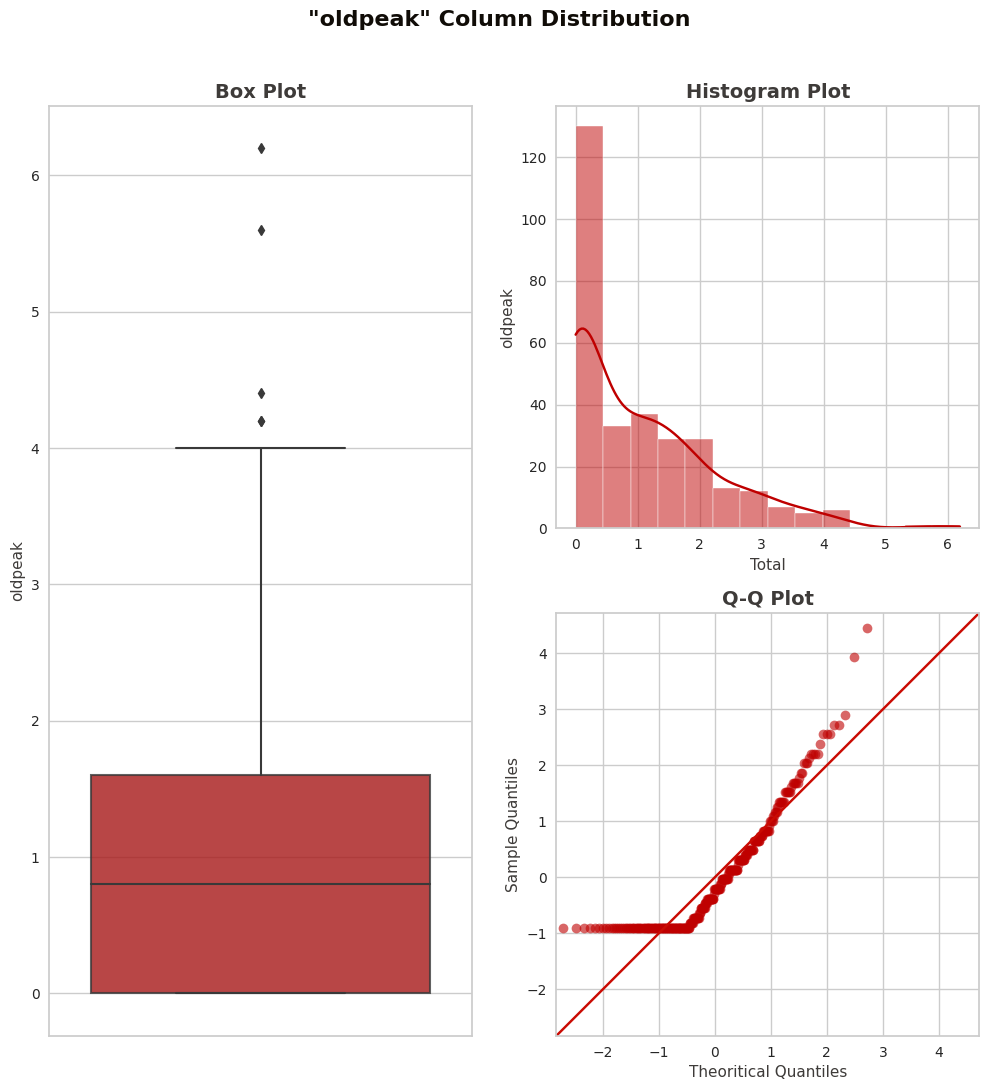

In [ ]:
# --- Variable, Color & Plot Size ---
var = 'oldpeak'
color = red_grad[1]
fig=plt.figure(figsize=(12, 12))

# --- Skewness & Kurtosis ---
print('\033[1m'+'.: "oldpeak" Column Skewness & Kurtosis :.'+'\033[0m')
print('*' * 40)
print('Skewness:'+'\033[1m {:.3f}'.format(data[var].skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(data[var].kurt(axis = 0, skipna = True)))
print('\n')

# --- General Title ---
fig.suptitle('"oldpeak" Column Distribution', fontweight='bold', 
             fontsize=16, fontfamily='sans-serif', color=black_grad[0])
fig.subplots_adjust(top=0.9)

# --- Histogram ---
ax_1=fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
sns.histplot(data=data, x=var, kde=True, color=color)
plt.xlabel('Total', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('oldpeak', fontweight='regular', fontsize=11,
           fontfamily='sans-serif', color=black_grad[1])

# --- Q-Q Plot ---
ax_2=fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[1])
qqplot(data[var], fit=True, line='45', ax=ax_2, markerfacecolor=color,
       markeredgecolor=color, alpha=0.6)
plt.xlabel('Theoritical Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Sample Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])

# --- Box Plot ---
ax_3=fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
sns.boxplot(data=data, y=var, color=color, boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('oldpeak', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])

plt.show()

## **Exploration Data Analysis**

1. Heart Disease Distribution based on Gender

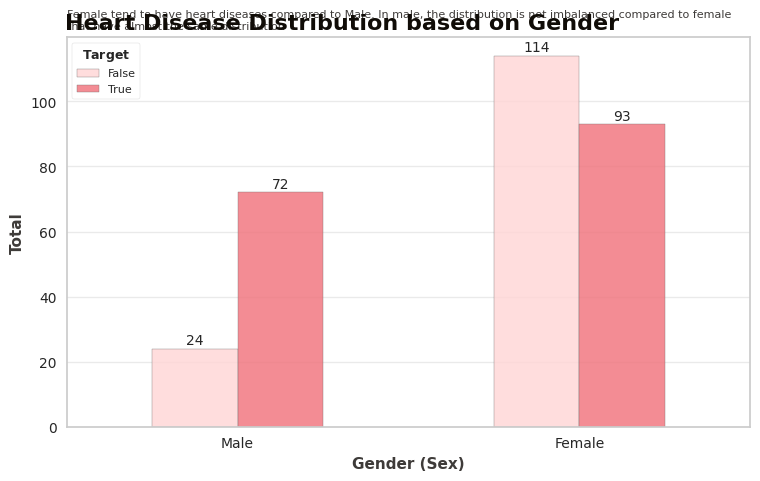

In [ ]:
# --- Labels Settings ---
labels = ['False', 'True']
label_gender = np.array([0, 1])
label_gender2 = ['Male', 'Female']

# --- Creating Bar Chart ---
ax = pd.crosstab(data.sex, data.target).plot(kind='bar', figsize=(8, 5), 
                                         color=color_mix[2:4], 
                                         edgecolor=black_grad[2], alpha=0.85)
# --- Bar Chart Settings ---
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+1.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10)

plt.suptitle('Heart Disease Distribution based on Gender', fontweight='heavy', 
             x=0.065, y=0.98, ha='left', fontsize='16', fontfamily='sans-serif', 
             color=black_grad[0])
plt.title('Female tend to have heart diseases compared to Male. In male, the distribution is not imbalanced compared to female\nthat have almost the same distribution', 
          fontsize='8', fontfamily='sans-serif', loc='left', color=black_grad[1])
plt.tight_layout(rect=[0, 0.04, 1, 1.025])
plt.xlabel('Gender (Sex)', fontfamily='sans-serif', fontweight='bold', 
           color=black_grad[1])
plt.ylabel('Total', fontfamily='sans-serif', fontweight='bold', 
           color=black_grad[1])
plt.xticks(label_gender, label_gender2, rotation=0)
plt.grid(axis='y', alpha=0.4)
plt.grid(axis='x', alpha=0)
plt.legend(labels=labels, title='$\\bf{Target}$', fontsize='8', 
           title_fontsize='9', loc='upper left', frameon=True);

2. Heart Disease Distributionbased on Major Vessel Total

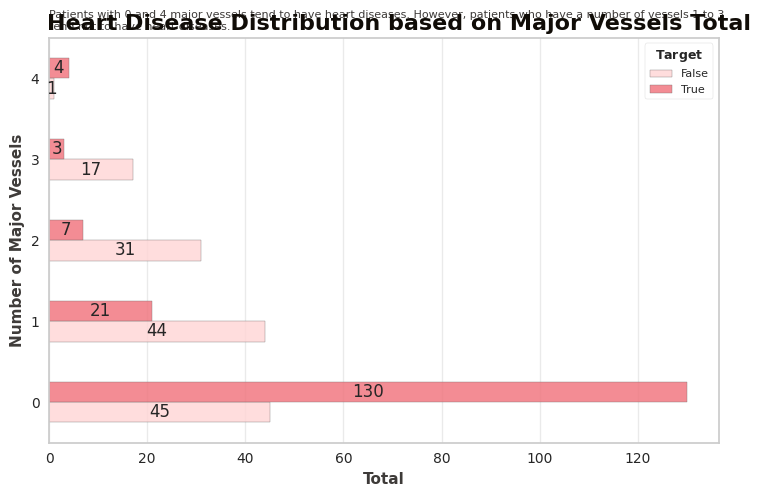

In [ ]:
# --- Labels Settings ---
labels = ['False', 'True']

# --- Creating Horizontal Bar Chart ---
ax = pd.crosstab(data.ca, data.target).plot(kind='barh', figsize=(8, 5), 
                                         color=color_mix[2:4],
                                         edgecolor=black_grad[2], alpha=0.85)
# --- Horizontal Bar Chart Settings ---
for rect in ax.patches:
    width, height = rect.get_width(), rect.get_height()
    x, y = rect.get_xy()
    ax.text (x+width/2, y+height/2, '{:.0f}'.format(width), 
             horizontalalignment='center', verticalalignment='center')

plt.suptitle('Heart Disease Distribution based on Major Vessels Total', 
             fontweight='heavy', x=0.069, y=0.98, ha='left', fontsize='16', 
             fontfamily='sans-serif', color=black_grad[0])
plt.title('Patients with 0 and 4 major vessels tend to have heart diseases. However, patients who have a number of vessels 1 to 3\ntend not to have heart diseases.', 
          fontsize='8', fontfamily='sans-serif', loc='left', color=black_grad[1])
plt.tight_layout(rect=[0, 0.04, 1, 1.025])
plt.xlabel('Total', fontfamily='sans-serif', fontweight='bold', color=black_grad[1])
plt.ylabel('Number of Major Vessels', fontfamily='sans-serif', fontweight='bold', 
           color=black_grad[1])
plt.yticks(rotation=0)
plt.grid(axis='x', alpha=0.4)
plt.grid(axis='y', alpha=0)
plt.legend(labels=labels, title='$\\bf{Target}$', fontsize='8', frameon=True,
           title_fontsize='9', loc='upper right');

3. Heart Disease Scatter Plot based on Age

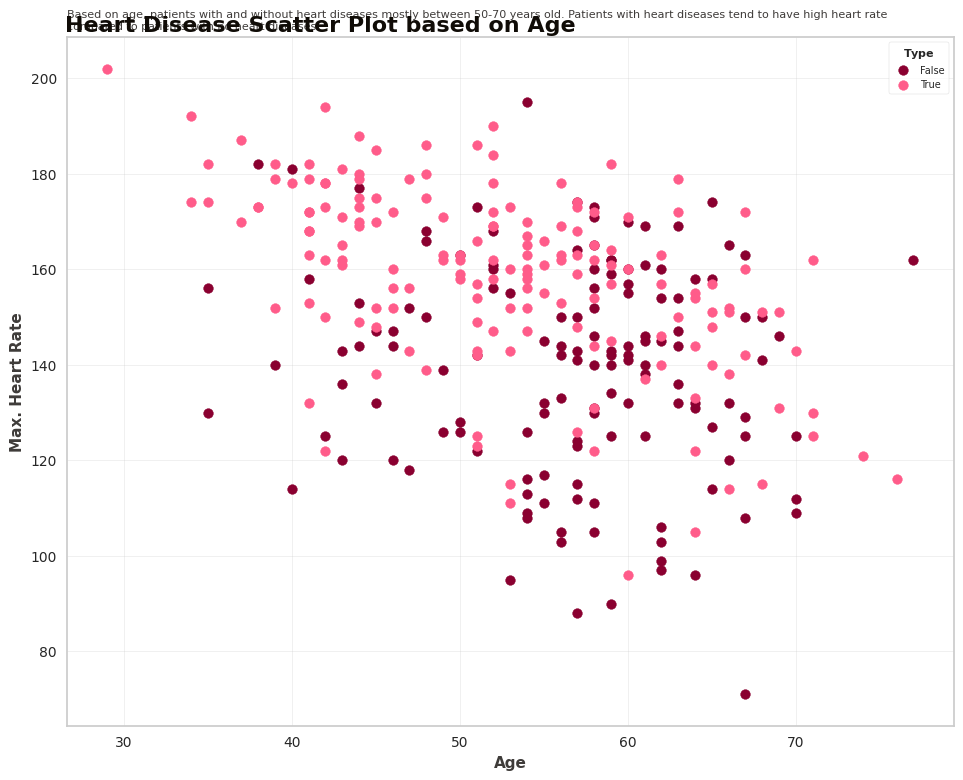

In [ ]:
# -- Scatter Plot Size & Titles Settings ---
plt.figure(figsize=(10, 8))
plt.suptitle('Heart Disease Scatter Plot based on Age', fontweight='heavy', 
             x=0.048, y=0.98, ha='left', fontsize='16', fontfamily='sans-serif', 
             color=black_grad[0])
plt.title('Based on age, patients with and without heart diseases mostly between 50-70 years old. Patients with heart diseases tend to have high heart rate\ncompared to patients with no heart diseases.', 
          fontsize='8', fontfamily='sans-serif', loc='left', color=black_grad[1])
plt.tight_layout(rect=[0, 0.04, 1, 1.01])

# --- Creating Scatter Plot ---
plt.scatter(x=data.age[data.target==0], y=data.thalach[(data.target==0)], c=pink_grad[0])
plt.scatter(x=data.age[data.target==1], y=data.thalach[(data.target==1)], c=pink_grad[2])

# --- Scatter Plot Legend & Labels Settings ---
plt.legend(['False', 'True'], title='$\\bf{Type}$', fontsize='7', 
           title_fontsize='8', loc='upper right', frameon=True)
plt.xlabel('Age', fontweight='bold', fontsize='11',
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Max. Heart Rate', fontweight='bold', fontsize='11', 
           fontfamily='sans-serif', color=black_grad[1])
plt.ticklabel_format(style='plain', axis='both')
plt.grid(axis='both', alpha=0.4, lw=0.5)
plt.show();

4. Chest Pain Type based on Age

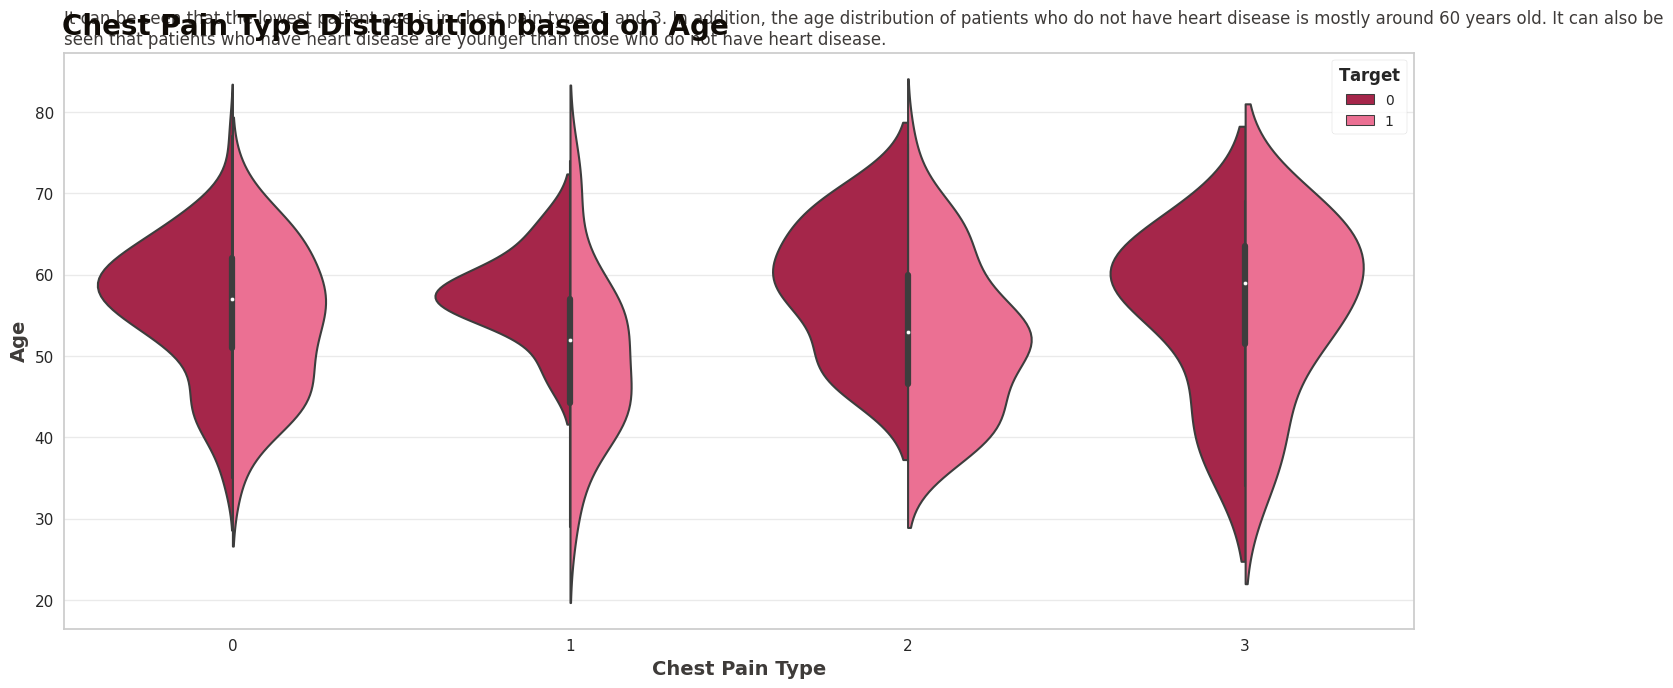

In [ ]:
# -- Violin Plot Size & Titles Settings ---
fig, ax = plt.subplots()
fig.set_size_inches(17, 7)
plt.suptitle('Chest Pain Type Distribution based on Age', fontweight='heavy', 
             x=0.028, y=0.98, ha='left', fontsize='20', fontfamily='sans-serif', 
             color=black_grad[0])
plt.title('It can be seen that the lowest patient age is in chest pain types 1 and 3. In addition, the age distribution of patients who do not have heart disease is mostly around 60 years old. It can also be\nseen that patients who have heart disease are younger than those who do not have heart disease.', 
          fontsize='12', fontfamily='sans-serif', loc='left', color=black_grad[1])
plt.tight_layout(rect=[0, 0.04, 1, 1.01])

# --- Creating Violin Plot based on Type ---
sns.violinplot(x='cp', y='age', hue='target', data=data, ax=ax, 
               palette=pink_grad[1:3], boxprops=dict(alpha=0.9), linewidth=1.5, 
               split=True)

# --- Violin Plot Legend & Labels Settings ---
plt.legend(title='$\\bf{Target}$', fontsize='10', title_fontsize='12', frameon=True,
           loc='upper right')
plt.xlabel('Chest Pain Type', fontweight='bold', fontsize='14', 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Age', fontweight='bold', fontsize='14', fontfamily='sans-serif', 
           color=black_grad[1])
plt.xticks(fontsize='11')
plt.yticks(fontsize='11')
plt.grid(axis='y', alpha=0.4)
plt.show();

5. Heart Disease Distribution based on Fasting Blood Sugar

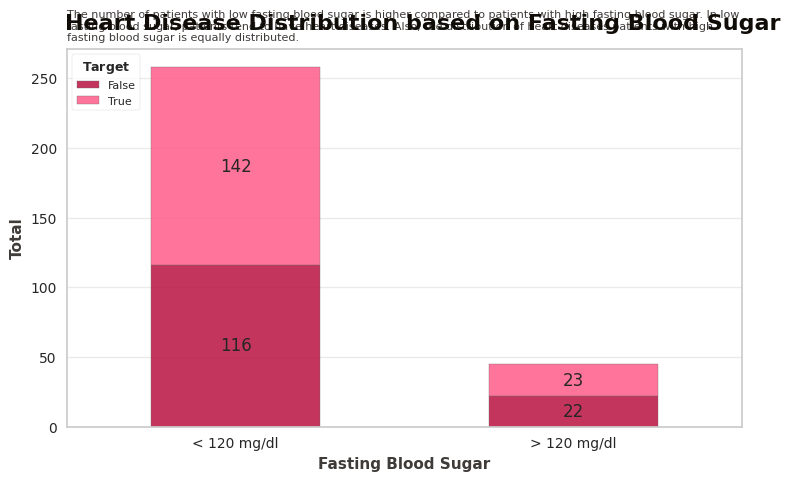

In [ ]:
# --- Labels Settings ---
labels = ['False', 'True']
label_gender = np.array([0, 1])
label_gender2 = ['< 120 mg/dl', '> 120 mg/dl']

# --- Creating Bar Chart ---
ax = pd.crosstab(data.fbs, data.target).plot(kind='bar', figsize=(8, 5), 
                                         color=pink_grad[1:3], stacked=True,
                                         edgecolor=black_grad[2], alpha=0.85)
# --- Bar Chart Settings ---
for rect in ax.patches:
    width, height = rect.get_width(), rect.get_height()
    x, y = rect.get_xy()
    ax.text (x+width/2, y+height/2, '{:.0f}'.format(height), 
             horizontalalignment='center', verticalalignment='center')

plt.suptitle('Heart Disease Distribution based on Fasting Blood Sugar', 
             fontweight='heavy', x=0.065, y=0.98, ha='left', fontsize='16', 
             fontfamily='sans-serif', color=black_grad[0])
plt.title('The number of patients with low fasting blood sugar is higher compared to patients with high fasting blood sugar. In low\nfasting blood sugar, patients tend to have heart diseases. Also, the distribution of heart diseases patients with high\nfasting blood sugar is equally distributed.', 
          fontsize='8', fontfamily='sans-serif', loc='left', color=black_grad[1])
plt.tight_layout(rect=[0, 0.04, 1, 1.025])
plt.xlabel('Fasting Blood Sugar', fontfamily='sans-serif', fontweight='bold', 
           color=black_grad[1])
plt.ylabel('Total', fontfamily='sans-serif', fontweight='bold', 
           color=black_grad[1])
plt.xticks(label_gender, label_gender2, rotation=0)
plt.grid(axis='y', alpha=0.4)
plt.grid(axis='x', alpha=0)
plt.legend(labels=labels, title='$\\bf{Target}$', fontsize='8', 
           title_fontsize='9', loc='upper left', frameon=True);

6. Heatmap

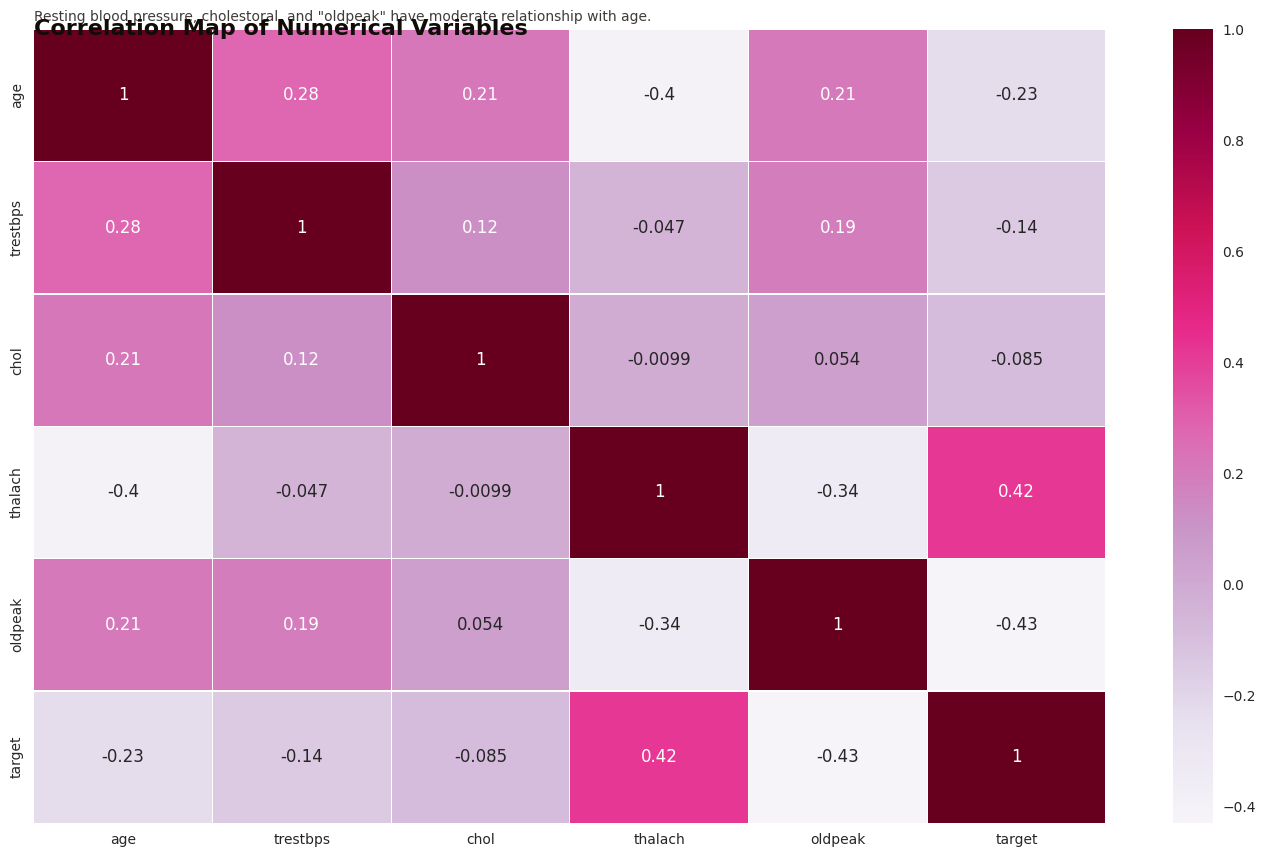

In [ ]:
# --- Correlation Map (Heatmap) ---
plt.figure(figsize=(14, 9))
sns.heatmap(data.corr(), annot=True, cmap='PuRd', linewidths=0.1)
plt.suptitle('Correlation Map of Numerical Variables', fontweight='heavy', 
             x=0.03, y=0.98, ha='left', fontsize='16', fontfamily='sans-serif', 
             color=black_grad[0])
plt.title('Resting blood pressure, cholestoral, and "oldpeak" have moderate relationship with age.', 
          fontsize='10', fontfamily='sans-serif', loc='left', color=black_grad[1])
plt.tight_layout(rect=[0, 0.04, 1, 1.01])


## **Dataset Pre-Processing**

1. One-Hot Encoding

In [ ]:
# --- Creating Dummy Variables for cp, thal and slope ---
cp = pd.get_dummies(data['cp'], prefix='cp')
thal = pd.get_dummies(data['thal'], prefix='thal')
slope = pd.get_dummies(data['slope'], prefix='slope')

# --- Merge Dummy Variables to Main Data Frame ---
frames = [data, cp, thal, slope]
data = pd.concat(frames, axis = 1)

In [ ]:
# --- Display New Data Frame ---
data.head().style.background_gradient(cmap='PuRd').hide_index().set_properties(**{'font-family': 'Segoe UI'})

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
63,1,3,145,233,1,0,150,0,2.300000,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0
37,1,2,130,250,0,1,187,0,3.500000,0,0,2,1,0,0,1,0,0,0,1,0,1,0,0
41,0,1,130,204,0,0,172,0,1.400000,2,0,2,1,0,1,0,0,0,0,1,0,0,0,1
56,1,1,120,236,0,1,178,0,0.800000,2,0,2,1,0,1,0,0,0,0,1,0,0,0,1
57,0,0,120,354,0,1,163,1,0.600000,2,0,2,1,1,0,0,0,0,0,1,0,0,0,1


2. Dropping Unnecessary Variables

In [ ]:
# --- Drop Unnecessary Variables ---
data = data.drop(columns = ['cp', 'thal', 'slope'])

In [ ]:
# --- Display New Data Frame ---
data.head().style.background_gradient(cmap='PuRd').hide_index().set_properties(**{'font-family': 'Segoe UI'})

age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
63,1,145,233,1,0,150,0,2.300000,0,1,0,0,0,1,0,1,0,0,1,0,0
37,1,130,250,0,1,187,0,3.500000,0,1,0,0,1,0,0,0,1,0,1,0,0
41,0,130,204,0,0,172,0,1.400000,0,1,0,1,0,0,0,0,1,0,0,0,1
56,1,120,236,0,1,178,0,0.800000,0,1,0,1,0,0,0,0,1,0,0,0,1
57,0,120,354,0,1,163,1,0.600000,0,1,1,0,0,0,0,0,1,0,0,0,1


3. Features Separating

In [ ]:
# --- Seperating Dependent Features ---
x = data.drop(['target'], axis=1)
y = data['target']

4. Data Normalization

In [ ]:
# --- Data Normalization using Min-Max Method ---
x = MinMaxScaler().fit_transform(x)

5. Splitting the Dataset

In [ ]:
# --- Splitting Dataset into 80:20 ---
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

## **Model Implementation**

**Gradient Boosting**

In [ ]:
# --- Applying Gradient Boosting ---
GBclassifier = GradientBoostingClassifier(random_state=1, n_estimators=100, max_leaf_nodes=3, loss='exponential', 
                                          min_samples_leaf=20)

GBclassifier.fit(x_train, y_train)
y_pred_GB = GBclassifier.predict(x_test)

.:. Gradient Boosting Accuracy: 95.08% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        25
           1       0.95      0.97      0.96        36

    accuracy                           0.95        61
   macro avg       0.95      0.95      0.95        61
weighted avg       0.95      0.95      0.95        61


.: Performance Evaluation
**************************


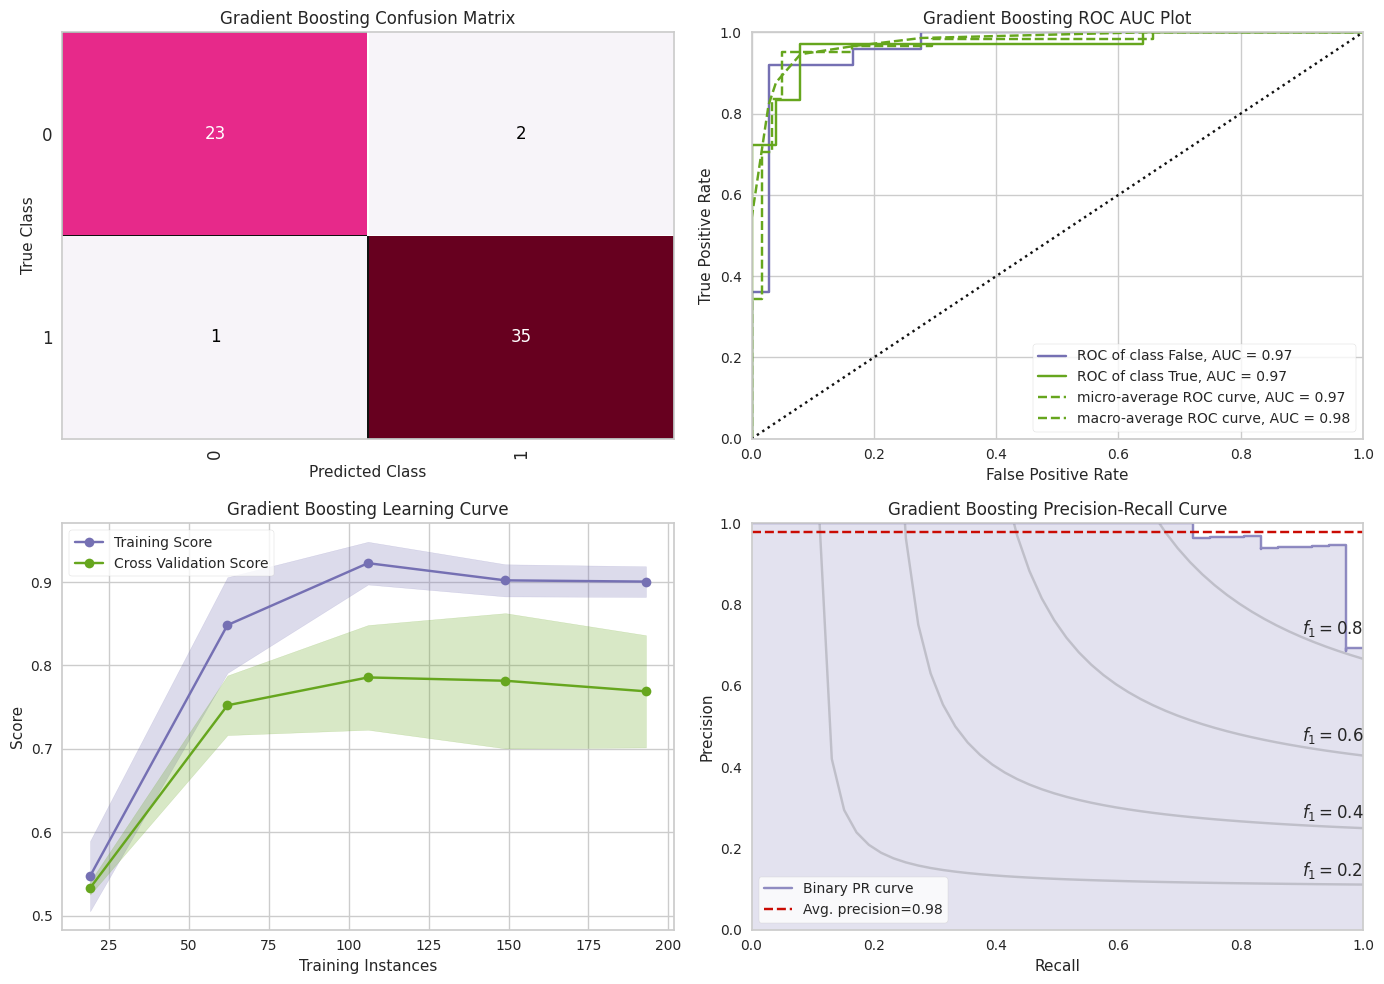

In [ ]:
# --- Gradient Boosting Accuracy ---
GBAcc = accuracy_score(y_pred_GB, y_test)
print('.:. Gradient Boosting Accuracy:'+'\033[1m {:.2f}%'.format(GBAcc*100)+' .:.')

# --- Gradient Boosting Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_GB))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# --- Gradient Boosting Confusion Matrix ---
gbcmatrix = ConfusionMatrix(GBclassifier, ax=ax1, cmap='PuRd',
                            title='Gradient Boosting Confusion Matrix')
gbcmatrix.fit(x_train, y_train)
gbcmatrix.score(x_test, y_test)
gbcmatrix.finalize()

# --- Gradient Boosting ROC AUC ---
gbcrocauc = ROCAUC(GBclassifier, classes=['False', 'True'], ax=ax2,
                   title='Gradient Boosting ROC AUC Plot')
gbcrocauc.fit(x_train, y_train)
gbcrocauc.score(x_test, y_test)
gbcrocauc.finalize()

# --- Gradient Boosting Learning Curve ---
gbclc = LearningCurve(GBclassifier, ax=ax3, title='Gradient Boosting Learning Curve')
gbclc.fit(x_train, y_train)
gbclc.finalize()

# --- Gradient Boosting Precision Recall Curve ---
gbcurve = PrecisionRecallCurve(GBclassifier, ax=ax4, ap_score=True, iso_f1_curves=True, 
                                title='Gradient Boosting Precision-Recall Curve')
gbcurve.fit(x_train, y_train)
gbcurve.score(x_test, y_test)
gbcurve.finalize()

plt.tight_layout();

In [ ]:
# --- Transform Test Set & Prediction into New Data Frame ---
test = pd.DataFrame(x_test, columns=['age_scaled', 'sex', 'trestbps_scaled', 
                                     'chol_scaled', 'fbs', 'restecg_scaled', 
                                     'thalach_scaled', 'exang', 'oldpeak_scaled', 
                                     'ca_scaled', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 
                                     'thal_0', 'thal_1', 'thal_2', 'thal_3',
                                     'slope_0', 'slope_1', 'slope_2'])
pred = pd.DataFrame(y_pred_GB, columns=['target'])
prediction = pd.concat([test, pred], axis=1, join='inner')

# --- Transforming 'cp' Column ---
prediction['cp_0'] = prediction['cp_0'].replace([1, 0],['0',''])
prediction['cp_1'] = prediction['cp_1'].replace([1, 0],['1', ''])
prediction['cp_2'] = prediction['cp_2'].replace([1, 0],['2', ''])
prediction['cp_3'] = prediction['cp_3'].replace([1, 0],['3', ''])

prediction['cp_0'] = np.where((prediction['cp_0'] == ''), prediction['cp_1'], prediction['cp_0'])
prediction['cp_0'] = np.where((prediction['cp_0'] == ''), prediction['cp_2'], prediction['cp_0'])
prediction['cp_0'] = np.where((prediction['cp_0'] == ''), prediction['cp_3'], prediction['cp_0'])

# --- Transforming 'thal' Column ---
prediction['thal_0'] = prediction['thal_0'].replace([1, 0],['0',''])
prediction['thal_1'] = prediction['thal_1'].replace([1, 0],['1', ''])
prediction['thal_2'] = prediction['thal_2'].replace([1, 0],['2', ''])
prediction['thal_3'] = prediction['thal_3'].replace([1, 0],['3', ''])

prediction['thal_0'] = np.where((prediction['thal_0'] == ''), prediction['thal_1'], prediction['thal_0'])
prediction['thal_0'] = np.where((prediction['thal_0'] == ''), prediction['thal_2'], prediction['thal_0'])
prediction['thal_0'] = np.where((prediction['thal_0'] == ''), prediction['thal_3'], prediction['thal_0'])

# --- Transforming 'slope' Column ---
prediction['slope_0'] = prediction['slope_0'].replace([1, 0],['0',''])
prediction['slope_1'] = prediction['slope_1'].replace([1, 0],['1', ''])
prediction['slope_2'] = prediction['slope_2'].replace([1, 0],['2', ''])

prediction['slope_0'] = np.where((prediction['slope_0'] == ''), prediction['slope_1'], prediction['slope_0'])
prediction['slope_0'] = np.where((prediction['slope_0'] == ''), prediction['slope_2'], prediction['slope_0'])

# --- Drop Unnecessary ---
prediction = prediction.drop(['cp_1', 'cp_2', 'cp_3', 'thal_1', 'thal_2', 'thal_3',
                 'slope_1', 'slope_2'], axis = 1)

# --- Rename Column Names ---
new_name = {'cp_0': 'cp', 'thal_0': 'thal', 'slope_0': 'slope'}
prediction.rename(columns=new_name, inplace=True)

# --- Display Prediction Result ---
prediction.head().style.background_gradient(cmap='Blues').hide_index().set_properties(**{'font-family': 'Segoe UI'})

age_scaled,sex,trestbps_scaled,chol_scaled,fbs,restecg_scaled,thalach_scaled,exang,oldpeak_scaled,ca_scaled,cp,thal,slope,target
0.291667,1.000000,0.150943,0.194064,0.000000,0.500000,0.687023,0.000000,0.000000,0.000000,0,3,2,1
0.833333,1.000000,0.433962,0.292237,0.000000,0.000000,0.572519,0.000000,0.322581,0.750000,2,3,1,0
0.291667,1.000000,0.528302,0.276256,0.000000,0.500000,0.763359,0.000000,0.241935,0.000000,0,2,2,1
0.270833,0.000000,0.245283,0.189498,0.000000,0.500000,0.778626,0.000000,0.000000,0.000000,2,2,1,1
0.333333,1.000000,0.150943,0.315068,0.000000,0.500000,0.465649,0.000000,0.193548,0.000000,3,3,1,0


In [ ]:
# --- Export Prediction Result into csv File ---
prediction.to_csv('prediction_heart_disease_caesarmario.csv', index=False)

In [ ]:
# --- Export Pickle File ---
file = open('heart_disease_GB_caesarmario.pkl', 'wb')
pickle.dump(GBclassifier, file)

## **Prediction Case**

In [ ]:
# --- Turn Information into List ---
data = [[0.254, 1, 0.487, 0.362,   ## age_scaled, sex, trestbps_scaled, chol
         1, 0.5, 0.641, 1,         ## fbs, restecg_scaled, thalach_scaled, exang
         0.672, 0.863, 0, 0,       ## oldpeak_scaled, ca_scaled, cp_0, cp_1
         0, 1, 0, 0,               ## cp_2, cp_3, thal_0, thal_1
         0, 1, 0, 1, 0]]           ## thal_2, thal_3, slope_0, slope_1, slope_2

# --- Prediction using Gradient Boosting ---
result = GBclassifier.predict(data)

# --- Print Heart Disease Status ---
if result[0] == 1:
  print('\033[1m' + '.:. Heart Disease Detected!.:.' + '\033[0m')
else:
  print('\033[1m' + '.:. Heart Disease Not Detected!.:.' + '\033[0m')

.:. Heart Disease Not Detected!.:.
